In [1]:
# The Iris flower dataset consists of three species: setosa, versicolor,
# and virginica. These species can be distinguished based on their
# measurements. Now, imagine that you have the measurements
# of Iris flowers categorized by their respective species. Your
# objective is to train a machine learning model that can learn from
# these measurements and accurately classify the Iris flowers into
# their respective species.

# Use the Iris dataset to develop a model that can classify iris
# flowers into different species based on their sepal and petal
# measurements. This dataset is widely used for introductory
# classification tasks.

In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving IRIS.csv to IRIS.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['IRIS.csv']))
print(df)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#DATA CLEANING AND GENERAL DESCRIPTIVE ANALYSIS

In [8]:
df_num=df.select_dtypes(exclude='object')#getting numerical columns in a separate data frame

In [9]:
print("Mean/Average of all numeric columns:")
print(df_num.mean(axis = 0))
print()
print("Minimum of all numeric columns:")
print(df_num.min(axis = 0))
print()
print("Maximum of all numeric columns:")
print(df_num.max(axis = 0))

Mean/Average of all numeric columns:
sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

Minimum of all numeric columns:
sepal_length    4.3
sepal_width     2.0
petal_length    1.0
petal_width     0.1
dtype: float64

Maximum of all numeric columns:
sepal_length    7.9
sepal_width     4.4
petal_length    6.9
petal_width     2.5
dtype: float64


In [10]:
print("Mean/Average of all numeric rows:")
print(df_num.mean(axis = 1))
print()
print("Minimum of all numeric rows:")
print(df_num.min(axis = 1))
print()
print("Maximum of all numeric rows:")
print(df_num.max(axis = 1))

Mean/Average of all numeric rows:
0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
       ...  
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64

Minimum of all numeric rows:
0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Length: 150, dtype: float64

Maximum of all numeric rows:
0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Length: 150, dtype: float64


In [11]:
#missing values

In [12]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
for col in df.columns:
  print(col)
  print(df[col].unique())
  print()

sepal_length
[5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]

sepal_width
[3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]

petal_length
[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]

petal_width
[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]

species
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']



In [15]:
numeric_columns=list(df.select_dtypes(exclude='object').columns)

In [16]:
numeric_columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [17]:
def calculate_row_num(col_num, len_num):
    rem = len_num%col_num
    if (rem) == 0:
        row_num = len_num // col_num
    elif (rem) != 0:
        row_num = (len_num + col_num - rem) // col_num
    if len_num == col_num:
        return row_num + 1
    return row_num

def plot_univariate_subplots(df,
                             col_num,
                             plot_type,
                             figsize = (30,30),
                             color_hue = None,
                             log_scale = False,
                             wspace = 0.25,
                             hspace = 0.6,
                             numeric_columns = numeric_columns
                             ):
    len_num = len(numeric_columns)
    row_num = calculate_row_num(col_num, len_num)
    fig, axes = plt.subplots(row_num, col_num, figsize=figsize)
    index = 0

    if plot_type == 'boxplot':
        graph_plot = lambda plot_type: sns.boxplot(data=df,
                                                   x=numeric_columns[index],
                                                   ax=axes[row,col],
                                                   color = color_hue)
    elif plot_type == 'kde':
        graph_plot = lambda plot_type: sns.kdeplot(data=df,
                                                   x=numeric_columns[index],
                                                   log_scale = log_scale,
                                                   ax=axes[row,col],
                                                   hue = color_hue,
                                                   bw_adjust=.30)
    elif plot_type == 'hist':
         graph_plot = lambda plot_type: sns.histplot(data=df,
                                                     x=numeric_columns[index],
                                                     log_scale = log_scale,
                                                     multiple = 'stack',
                                                     ax=axes[row,col],
                                                     hue = color_hue)
    elif plot_type == 'count':
        graph_plot = lambda plot_type: sns.countplot(data = df,
                                                     x=numeric_columns[index],
                                                     ax=axes[row,col],
                                                     hue = color_hue)
    for row in range(row_num):
        for col in range(col_num):
            if index>=len(numeric_columns):
                axes[row,col].set_axis_off()
            if index<len(numeric_columns):
                graph_plot(plot_type)
            index = index + 1
    plt.subplots_adjust(wspace=wspace, hspace=hspace)

In [18]:
#box plots

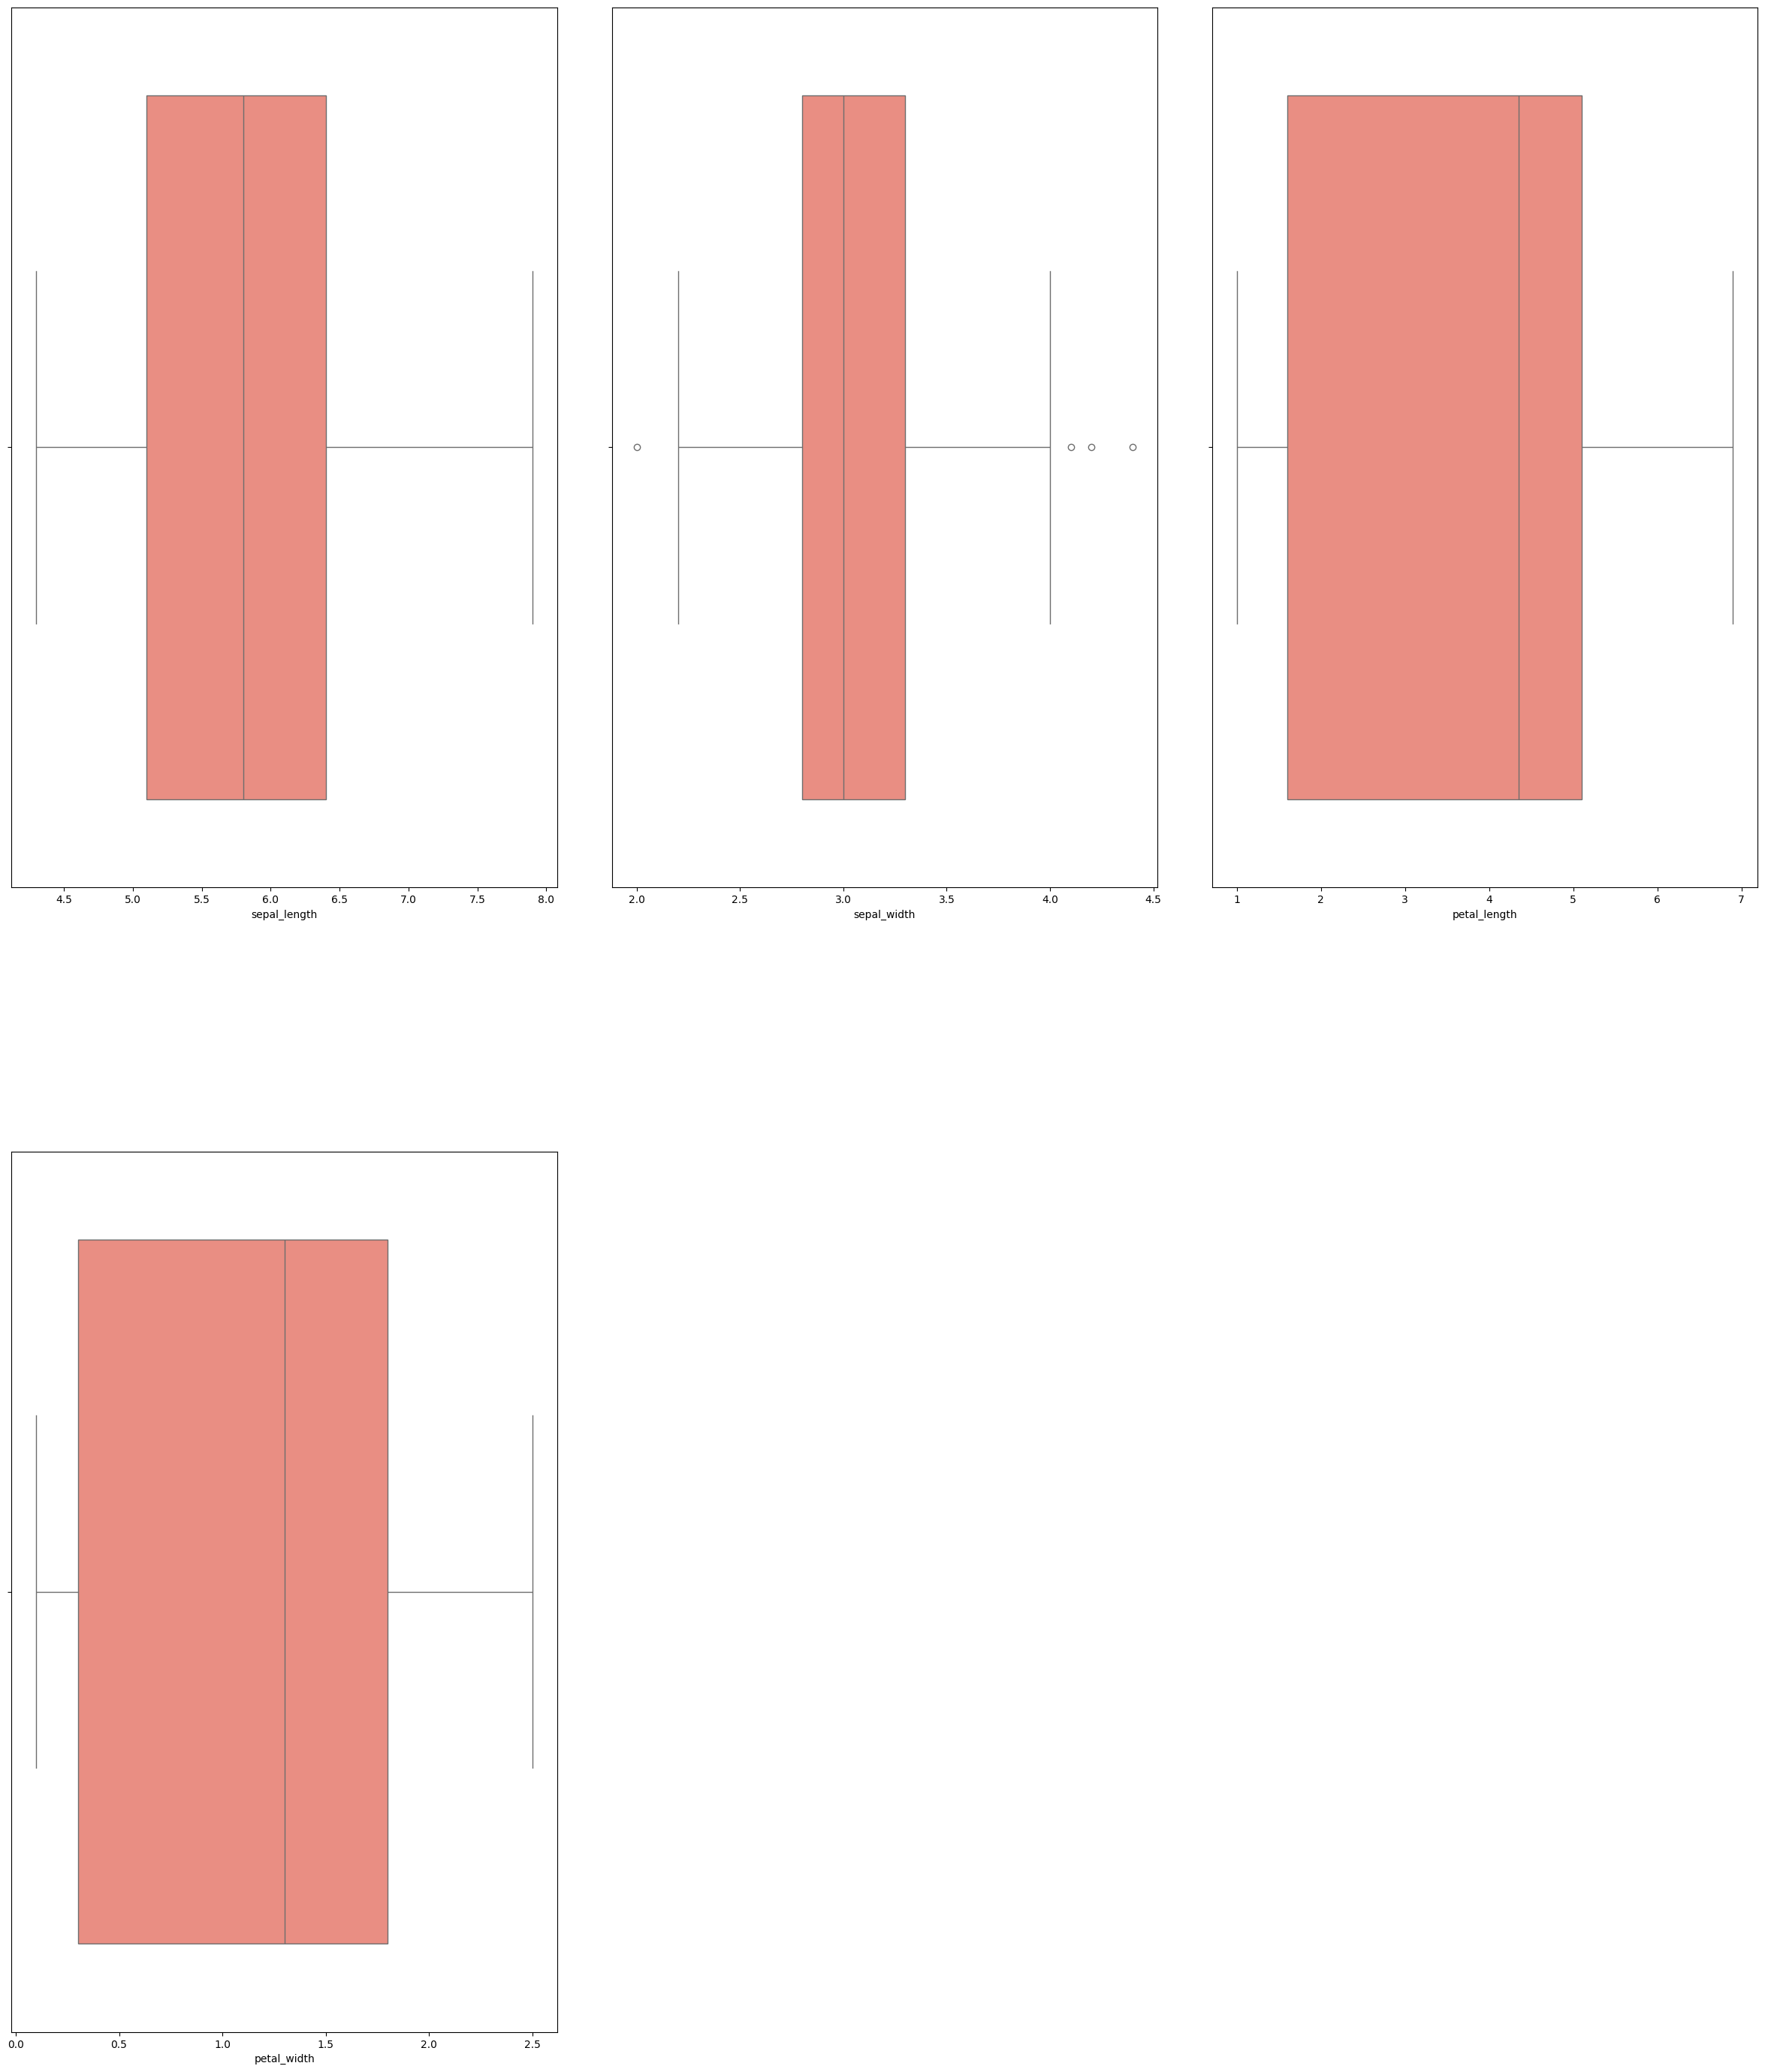

In [19]:
plot_univariate_subplots(df = df,
                         col_num = 3,
                         plot_type = 'boxplot',
                         figsize = (30,35),
                         color_hue = 'salmon',
                         wspace = 0.1,
                         hspace = 0.3,
                         numeric_columns = numeric_columns)

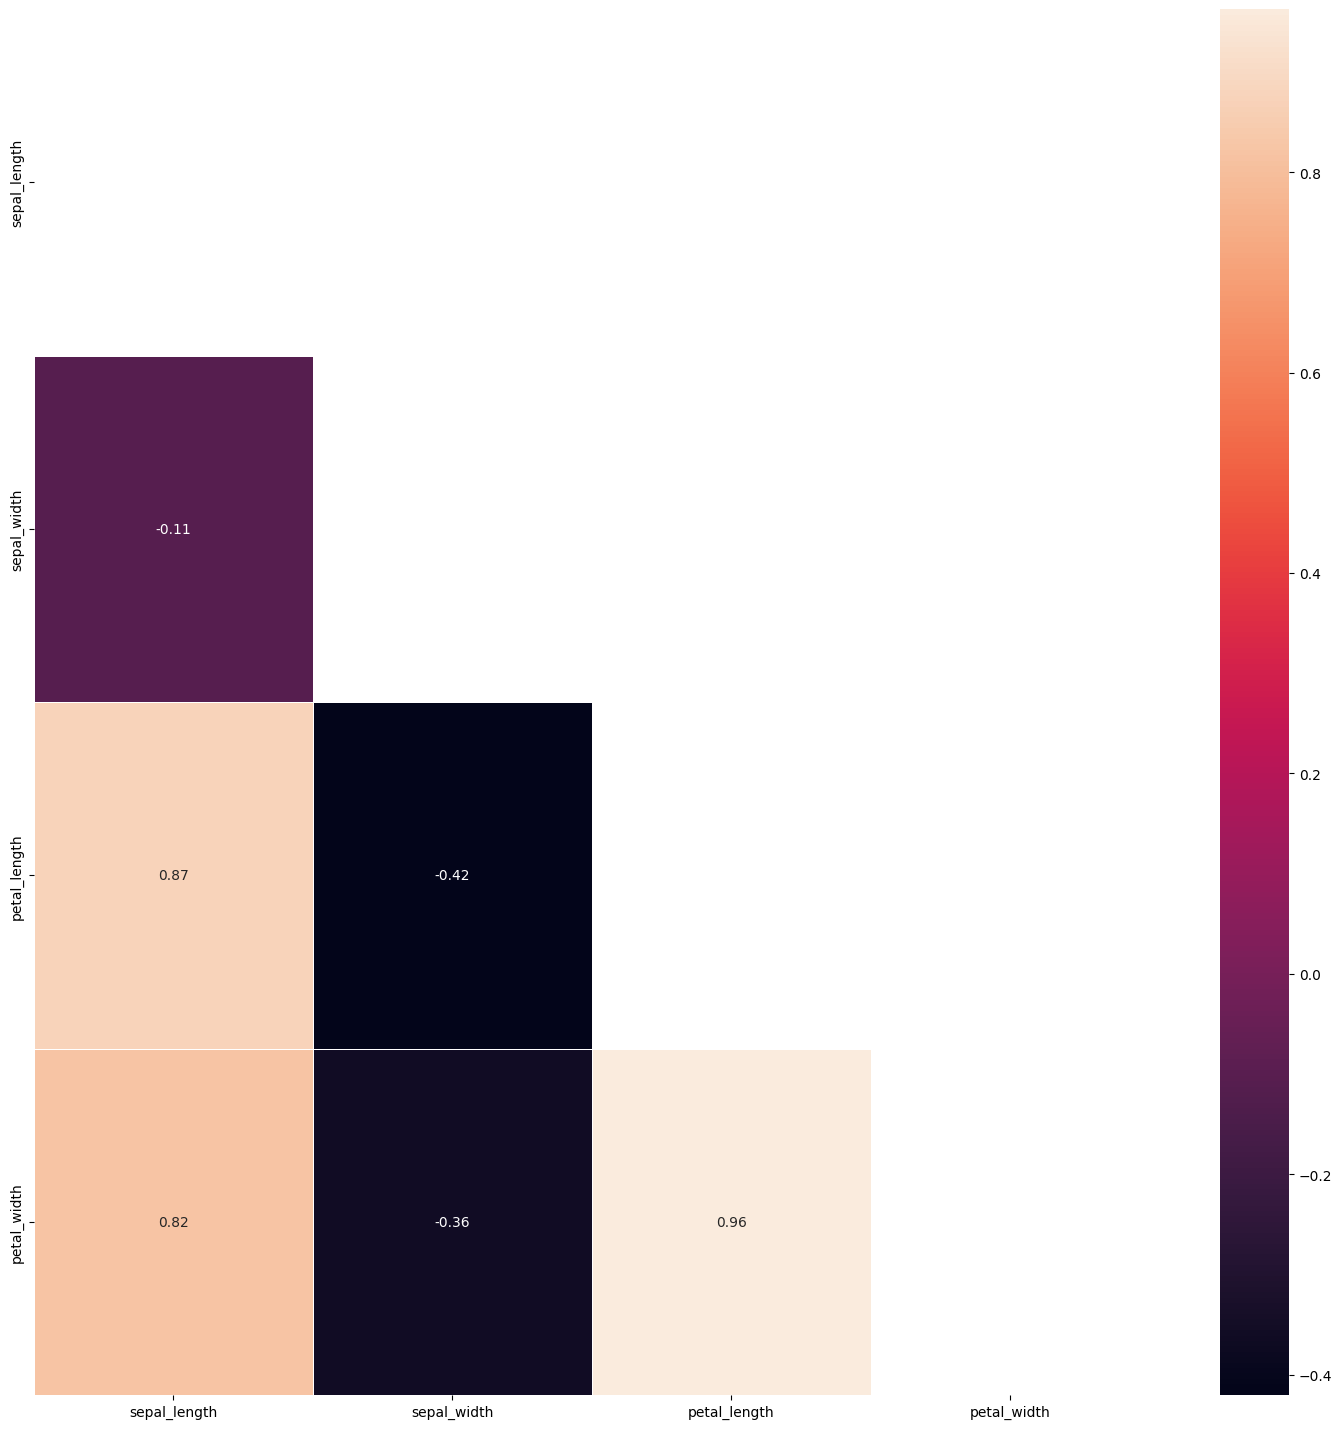

In [20]:
temp = df.loc[:,numeric_columns].corr()
fig,axes = plt.subplots(figsize=(18, 18))
matrix = np.triu(temp)
sns.heatmap(temp, annot=True, linewidths=.5,ax=axes, mask=matrix)
plt.show()

In [23]:
#machine learning

In [24]:
x = df.drop('species', axis=1)
y = df['species']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [35]:
#random forest

In [36]:
rf = RandomForestClassifier(random_state=42)

In [37]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('model', model)])

mean_accuracy = cross_val_score(pipeline, X_train, y_train, cv=5).mean()

pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print("Model:", RandomForestClassifier())
print("Cross-validation Accuracy:", mean_accuracy)
print("Test Accuracy:", accuracy)

Model: RandomForestClassifier()
Cross-validation Accuracy: 0.9458498023715414
Test Accuracy: 1.0
